In [1]:
import numpy as np
import pandas as pd
import os

from warnings import simplefilter
simplefilter(action = 'ignore', category = FutureWarning) 
simplefilter(action = 'ignore', category = UserWarning)
pd.options.mode.chained_assignment = None 

# Data Preprocessing / Data Exploration

In [2]:
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'Most-Recent-Cohorts-All-Data-Elements.csv')

cohort_data = pd.read_csv(file_path, low_memory = False)
print(cohort_data.shape)
cohort_data.head(1)

(7058, 1977)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.4048,0.2645,0.0137,0.315,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852


### Data Cleansing

In [3]:
# Only include operating institutions
cohort_data = cohort_data.loc[cohort_data['CURROPER'] == 1]

# Reset index
cohort_data = cohort_data.reset_index()
cohort_data.tail(1)

# Avoid copy warning
cohort_data.is_copy = False

# Replace all strings with 0; fill NaN values with 0
cohort_data = cohort_data.replace('PrivacySuppressed', 0)
cohort_data = cohort_data.fillna(0)

print(cohort_data.shape)

# Filling null values with non-online status with 0
cohort_data['DISTANCEONLY'] = cohort_data['DISTANCEONLY'].fillna(0.0)

(6563, 1978)


In [4]:
# Rename columns
cohort_data = cohort_data.rename(columns = {
    'LO_INC_RPY_1YR_RT': 'LOINCOMERPY1YR',
    'COMPL_RPY_1YR_RT': 'COMPLETERPY1YR',
    'MD_INC_RPY_1YR_RT': 'MDINCOMERPY1YR',
    'COMPL_RPY_3YR_RT': 'COMPLETERPY3YR',
    'LO_INC_RPY_3YR_RT': 'LOINCOMERPY3YR',
    'MD_INC_RPY_3YR_RT': 'MDINCOMERPY3YR',
    'COMPL_RPY_5YR_RT': 'COMPLETERPY5YR',
    'LO_INC_RPY_5YR_RT': 'LOINCOMERPY5YR',
    'MD_INC_RPY_5YR_RT': 'MDINCOMERPY5YR',
    'COMPL_RPY_7YR_RT': 'COMPLETERPY7YR',
    'LO_INC_RPY_7YR_RT': 'LOINCOMERPY7YR',
    'MD_INC_RPY_7YR_RT': 'MDINCOMERPY7YR'
})

### Features Selection

In [5]:
# Select the features that will be used for the model
data = cohort_data[['INSTNM', 'HIGHDEG', 'ICLEVEL', 'CONTROL', 'DISTANCEONLY', 'COSTT4_A', 'COSTT4_P',
                    'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MD_FAMINC', 'DEBT_MDN', 'GT_25K_P6', 'GT_28K_P6',
                    'CDR3', 'COMPLETERPY1YR', 'LOINCOMERPY1YR', 'MDINCOMERPY1YR', 'COMPLETERPY3YR',
                    'LOINCOMERPY3YR', 'MDINCOMERPY3YR', 'COMPLETERPY5YR', 'LOINCOMERPY5YR', 'MDINCOMERPY5YR',
                    'COMPLETERPY7YR', 'LOINCOMERPY7YR', 'MDINCOMERPY7YR', 'C100_4', 'C100_L4', 'C150_4',
                    'C150_L4', 'C200_4', 'C200_L4', 'C150_4_PELL', 'C150_L4_PELL']]
data.head(1)

,INSTNM,HIGHDEG,ICLEVEL,CONTROL,DISTANCEONLY,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,MD_FAMINC,...,LOINCOMERPY7YR,MDINCOMERPY7YR,C100_4,C100_L4,C150_4,C150_L4,C200_4,C200_L4,C150_4_PELL,C150_L4_PELL
0,Alabama A & M University,4,1,1,0.0,22886.0,0.0,9857.0,18236.0,23553,...,0.3685823755,0.3972179289,0.0381,0.0,0.2396,0.0,0.3503,0.0,0.2219,0.0


In [6]:
# Avoid some warnings
data.is_copy = False

# Get data types of the features
data.dtypes

INSTNM             object
HIGHDEG             int64
ICLEVEL             int64
CONTROL             int64
DISTANCEONLY      float64
COSTT4_A          float64
COSTT4_P          float64
TUITIONFEE_IN     float64
TUITIONFEE_OUT    float64
MD_FAMINC          object
DEBT_MDN           object
GT_25K_P6          object
GT_28K_P6          object
CDR3              float64
COMPLETERPY1YR     object
LOINCOMERPY1YR     object
MDINCOMERPY1YR     object
COMPLETERPY3YR     object
LOINCOMERPY3YR     object
MDINCOMERPY3YR     object
COMPLETERPY5YR     object
LOINCOMERPY5YR     object
MDINCOMERPY5YR     object
COMPLETERPY7YR     object
LOINCOMERPY7YR     object
MDINCOMERPY7YR     object
C100_4            float64
C100_L4           float64
C150_4            float64
C150_L4           float64
C200_4            float64
C200_L4           float64
C150_4_PELL       float64
C150_L4_PELL      float64
dtype: object

In [7]:
# Convert objects to numericals
data['LOINCOMERPY1YR'] = data['LOINCOMERPY1YR'].astype(float)
data['MDINCOMERPY1YR'] = data['MDINCOMERPY1YR'].astype(float)
data['COMPLETERPY1YR'] = data['COMPLETERPY1YR'].astype(float)
data['LOINCOMERPY3YR'] = data['LOINCOMERPY3YR'].astype(float)
data['MDINCOMERPY3YR'] = data['MDINCOMERPY3YR'].astype(float)
data['COMPLETERPY3YR'] = data['COMPLETERPY3YR'].astype(float)
data['LOINCOMERPY5YR'] = data['LOINCOMERPY5YR'].astype(float)
data['MDINCOMERPY5YR'] = data['MDINCOMERPY5YR'].astype(float)
data['COMPLETERPY5YR'] = data['COMPLETERPY5YR'].astype(float)
data['LOINCOMERPY7YR'] = data['LOINCOMERPY7YR'].astype(float)
data['MDINCOMERPY7YR'] = data['MDINCOMERPY7YR'].astype(float)
data['COMPLETERPY7YR'] = data['COMPLETERPY7YR'].astype(float)
data['GT_25K_P6'] = data['GT_25K_P6'].astype(float)
data['GT_28K_P6'] = data['GT_28K_P6'].astype(float)
data['MD_FAMINC'] = data['MD_FAMINC'].astype(float)
data['DEBT_MDN'] = data['DEBT_MDN'].astype(float)

### Feature Engineering

##### Earnings over 25K or 28K per year after graduation

In [8]:
# Defining earnings threshold
def earnings_threshold(twentyfive_threshold, twentyeight_threshold):
    if twentyfive_threshold >= 0.65 or twentyeight_threshold >=  0.65:
        return 1
    else:
        return 0

data['Earnings'] = data.apply(lambda x: earnings_threshold(x['GT_25K_P6'], x['GT_28K_P6']), axis = 1)
data.head()


,INSTNM,HIGHDEG,ICLEVEL,CONTROL,DISTANCEONLY,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,MD_FAMINC,...,MDINCOMERPY7YR,C100_4,C100_L4,C150_4,C150_L4,C200_4,C200_L4,C150_4_PELL,C150_L4_PELL,Earnings
0,Alabama A & M University,4,1,1,0.0,22886.0,0.0,9857.0,18236.0,23553.0,...,0.397218,0.0381,0.0,0.2396,0.0,0.3503,0.0,0.2219,0.0,0
1,University of Alabama at Birmingham,4,1,1,0.0,24129.0,0.0,8328.0,19032.0,34489.0,...,0.648849,0.3179,0.0,0.5292,0.0,0.5767,0.0,0.4742,0.0,1
2,Amridge University,4,1,2,1.0,15080.0,0.0,6900.0,6900.0,15033.5,...,0.000000,0.0000,0.0,0.1818,0.0,0.2857,0.0,0.0000,0.0,1
3,University of Alabama in Huntsville,4,1,1,0.0,22108.0,0.0,10280.0,21480.0,44787.0,...,0.680000,0.2270,0.0,0.4862,0.0,0.5297,0.0,0.3854,0.0,1
4,Alabama State University,4,1,1,0.0,19413.0,0.0,11068.0,19396.0,22080.5,...,0.341969,0.1129,0.0,0.2769,0.0,0.2994,0.0,0.2211,0.0,0


##### Repayment

In [9]:
# Filling gap for low-middle income students
def lo_mi_income_mean(YRlo_income, YRmi_income):
    return (YRlo_income + YRmi_income) / 2

data['LOMIAVGRPY1YR'] = data.apply(lambda x: lo_mi_income_mean(x['LOINCOMERPY1YR'], x['MDINCOMERPY1YR']), axis = 1)
data['LOMIAVGRPY3YR'] = data.apply(lambda x: lo_mi_income_mean(x['LOINCOMERPY3YR'], x['MDINCOMERPY3YR']), axis = 1)
data['LOMIAVGRPY5YR'] = data.apply(lambda x: lo_mi_income_mean(x['LOINCOMERPY5YR'], x['MDINCOMERPY5YR']), axis = 1)
data['LOMIAVGRPY7YR'] = data.apply(lambda x: lo_mi_income_mean(x['LOINCOMERPY7YR'], x['MDINCOMERPY7YR']), axis = 1)

In [10]:
# Defining repayment completion rate
def repayment_completion_rate(default_rate, threeyear_loincome_repayment, threeyear_lomiincome_repayment,
                              fiveyear_loincome_repayment, fiveyear_lomiincome_repayment,
                              sevenyear_loincome_repayment, sevenyear_lomiincome_repayment):
    if default_rate >= 0.4:
        return 0
    elif (threeyear_loincome_repayment > 0.5 or threeyear_lomiincome_repayment > 0.5 or
          fiveyear_loincome_repayment > 0.5 or fiveyear_lomiincome_repayment > 0.5 or
          sevenyear_loincome_repayment > 0.5 or sevenyear_lomiincome_repayment > 0.5):
        return 1
    elif (threeyear_loincome_repayment <= 0.5 or threeyear_lomiincome_repayment <= 0.5 or
          fiveyear_loincome_repayment <= 0.5 or fiveyear_lomiincome_repayment <= 0.5 or
          sevenyear_loincome_repayment <= 0.5 or sevenyear_lomiincome_repayment <= 0.5):
        return 0

data['Repayment'] = data.apply(lambda x: repayment_completion_rate(x['CDR3'], x['LOINCOMERPY3YR'], x['LOMIAVGRPY3YR'],
                                                                   x['LOINCOMERPY5YR'], x['LOMIAVGRPY5YR'],
                                                                   x['LOINCOMERPY7YR'], x['LOMIAVGRPY7YR']), axis = 1)
data.head()

,INSTNM,HIGHDEG,ICLEVEL,CONTROL,DISTANCEONLY,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,MD_FAMINC,...,C200_4,C200_L4,C150_4_PELL,C150_L4_PELL,Earnings,LOMIAVGRPY1YR,LOMIAVGRPY3YR,LOMIAVGRPY5YR,LOMIAVGRPY7YR,Repayment
0,Alabama A & M University,4,1,1,0.0,22886.0,0.0,9857.0,18236.0,23553.0,...,0.3503,0.0,0.2219,0.0,0,0.182355,0.257468,0.331283,0.382900,0
1,University of Alabama at Birmingham,4,1,1,0.0,24129.0,0.0,8328.0,19032.0,34489.0,...,0.5767,0.0,0.4742,0.0,1,0.426397,0.501073,0.544233,0.623943,1
2,Amridge University,4,1,2,1.0,15080.0,0.0,6900.0,6900.0,15033.5,...,0.2857,0.0,0.0000,0.0,1,0.186565,0.083086,0.136364,0.199367,0
3,University of Alabama in Huntsville,4,1,1,0.0,22108.0,0.0,10280.0,21480.0,44787.0,...,0.5297,0.0,0.3854,0.0,1,0.469720,0.518486,0.569444,0.622811,1
4,Alabama State University,4,1,1,0.0,19413.0,0.0,11068.0,19396.0,22080.5,...,0.2994,0.0,0.2211,0.0,0,0.143625,0.226333,0.300971,0.325331,0


##### Pell completion rate

In [11]:
# Defining completion rate
def completion_rate(c100_4, c100_l4, c150_4, c150_l4, c150_4_pell, c150_l4_pell, c200_4, c200_l4):
    if (c100_4 >= 0.5 or c100_l4 >= 0.5 or c150_4 >= 0.5 or c150_l4 >= 0.5 or c150_4_pell >= 0.5 or
        c150_l4_pell >= 0.5 or c200_4 >= 0.5 or c200_l4 >= 0.5):
        return 1
    else:
        return 0

data['CompletionRate'] = data.apply(lambda x: completion_rate(x['C100_4'], x['C100_L4'], x['C150_4'],
                                                              x['C150_L4'], x['C150_4_PELL'], x['C150_L4_PELL'],
                                                              x['C200_4'], x['C200_L4']), axis = 1)
data.head()

,INSTNM,HIGHDEG,ICLEVEL,CONTROL,DISTANCEONLY,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,MD_FAMINC,...,C200_L4,C150_4_PELL,C150_L4_PELL,Earnings,LOMIAVGRPY1YR,LOMIAVGRPY3YR,LOMIAVGRPY5YR,LOMIAVGRPY7YR,Repayment,CompletionRate
0,Alabama A & M University,4,1,1,0.0,22886.0,0.0,9857.0,18236.0,23553.0,...,0.0,0.2219,0.0,0,0.182355,0.257468,0.331283,0.382900,0,0
1,University of Alabama at Birmingham,4,1,1,0.0,24129.0,0.0,8328.0,19032.0,34489.0,...,0.0,0.4742,0.0,1,0.426397,0.501073,0.544233,0.623943,1,1
2,Amridge University,4,1,2,1.0,15080.0,0.0,6900.0,6900.0,15033.5,...,0.0,0.0000,0.0,1,0.186565,0.083086,0.136364,0.199367,0,0
3,University of Alabama in Huntsville,4,1,1,0.0,22108.0,0.0,10280.0,21480.0,44787.0,...,0.0,0.3854,0.0,1,0.469720,0.518486,0.569444,0.622811,1,1
4,Alabama State University,4,1,1,0.0,19413.0,0.0,11068.0,19396.0,22080.5,...,0.0,0.2211,0.0,0,0.143625,0.226333,0.300971,0.325331,0,0


### Selected Features and Target Variable

In [12]:
# Define loan prediction
def predict(earnings, repayment, completion):
    if earnings == 1 and repayment == 1 and completion == 1:
        return 1
    else:
        return 0

data['LoanApproved'] = data.apply(lambda x: predict(x['Earnings'], x['Repayment'], x['CompletionRate']), axis = 1)
loan_data = data[['INSTNM', 'Earnings', 'Repayment', 'CompletionRate', 'LoanApproved']]
loan_data.head()

,INSTNM,Earnings,Repayment,CompletionRate,LoanApproved
0,Alabama A & M University,0,0,0,0
1,University of Alabama at Birmingham,1,1,1,1
2,Amridge University,1,0,0,0
3,University of Alabama in Huntsville,1,1,1,1
4,Alabama State University,0,0,0,0


In [13]:
loan_data['INSTNM'] = loan_data['INSTNM'].astype('category')
loan_data['INSTNM'] = loan_data['INSTNM'].cat.codes

# Normalize INSTNM feature
loan_data['INSTNM'] = loan_data['INSTNM'] / max(loan_data['INSTNM'])
loan_data.head()

,INSTNM,Earnings,Repayment,CompletionRate,LoanApproved
0,0.014257,0,0,0,0
1,0.897567,1,1,1,1
2,0.035022,1,0,0,0
3,0.897722,1,1,1,1
4,0.015032,0,0,0,0


### Model Design

In [14]:
import keras
from sklearn.model_selection import train_test_split

2024-04-28 22:29:35.272436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
X = loan_data[['INSTNM','Earnings','Repayment','CompletionRate']].values
Y = loan_data['LoanApproved'].values

X = np.array(X)
Y = np.array(Y)

In [16]:
seed = 20
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(6, input_dim = 4, activation = 'relu'))

model.add(keras.layers.Dense(6, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['acc'])

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50, batch_size = 256)
model.save('loan_predictor.keras')

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.1586 - loss: 0.8182 - val_acc: 0.2894 - val_loss: 0.7396
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3258 - loss: 0.7231 - val_acc: 0.6481 - val_loss: 0.6705
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7159 - loss: 0.6590 - val_acc: 0.8957 - val_loss: 0.6220
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9059 - loss: 0.6133 - val_acc: 0.9650 - val_loss: 0.5869
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9675 - loss: 0.5805 - val_acc: 1.0000 - val_loss: 0.5604
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9727 - loss: 0.5548 - val_acc: 0.8949 - val_loss: 0.5387
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8893 - loss: 0.5335 - val_acc: 0.8690 - val_loss: 0.5204
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8692 - loss: 0.5171 - val_acc: 0.8690 - val_loss: 0.5045
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8686 - loss:

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


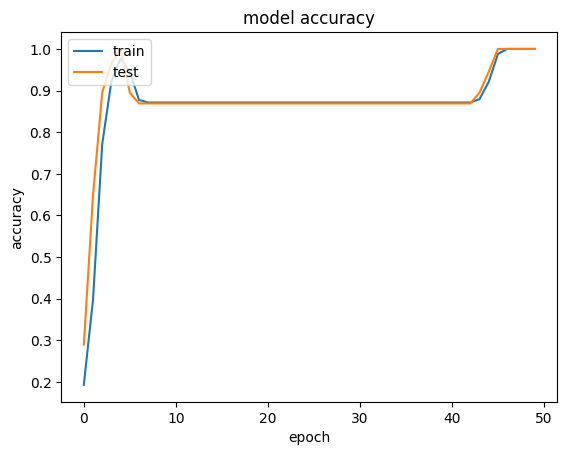

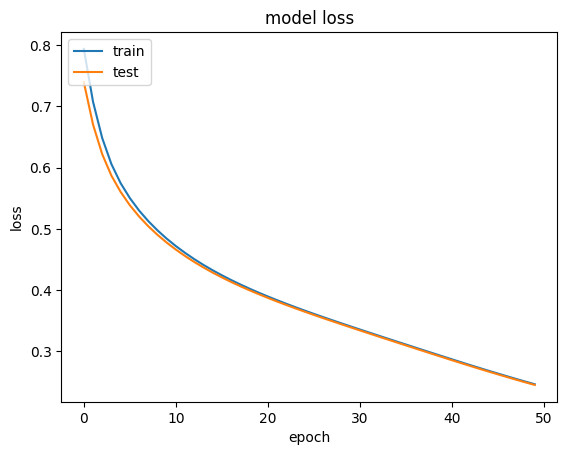

In [18]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()